In [3]:
import pandas as pd

unroll2 = pd.read_csv("./unroll2.csv")
unroll4 = pd.read_csv("./unroll4.csv")
unroll2["time"] = unroll2["time"] * 1000
unroll4["time"] = unroll4["time"] * 1000

print(unroll2.to_latex(header=True, index=False, float_format="%g"))
print(unroll4.to_latex(header=True, index=False, float_format="%g"))

\begin{tabular}{lrr}
\toprule
algorithm & array_length & time \\
\midrule
plain & 128 & 0.00655874 \\
plain & 256 & 0.00760896 \\
plain & 512 & 0.0106856 \\
plain & 1024 & 0.0162711 \\
plain & 2048 & 0.027929 \\
plain & 4096 & 0.0505665 \\
plain & 8192 & 0.0946497 \\
plain & 16384 & 0.18755 \\
auto & 128 & 0.00593386 \\
auto & 256 & 0.00786736 \\
auto & 512 & 0.00968278 \\
auto & 1024 & 0.0124476 \\
auto & 2048 & 0.0171976 \\
auto & 4096 & 0.0267017 \\
auto & 8192 & 0.0402455 \\
auto & 16384 & 0.070792 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrr}
\toprule
algorithm & array_length & time \\
\midrule
plain & 128 & 0.00674264 \\
plain & 256 & 0.00753692 \\
plain & 512 & 0.0105057 \\
plain & 1024 & 0.0163952 \\
plain & 2048 & 0.0285608 \\
plain & 4096 & 0.0499976 \\
plain & 8192 & 0.09533 \\
plain & 16384 & 0.186542 \\
auto & 128 & 0.00697554 \\
auto & 256 & 0.00738098 \\
auto & 512 & 0.0091367 \\
auto & 1024 & 0.0123843 \\
auto & 2048 & 0.0183268 \\
auto & 4096 & 0.0262108 \\
auto &

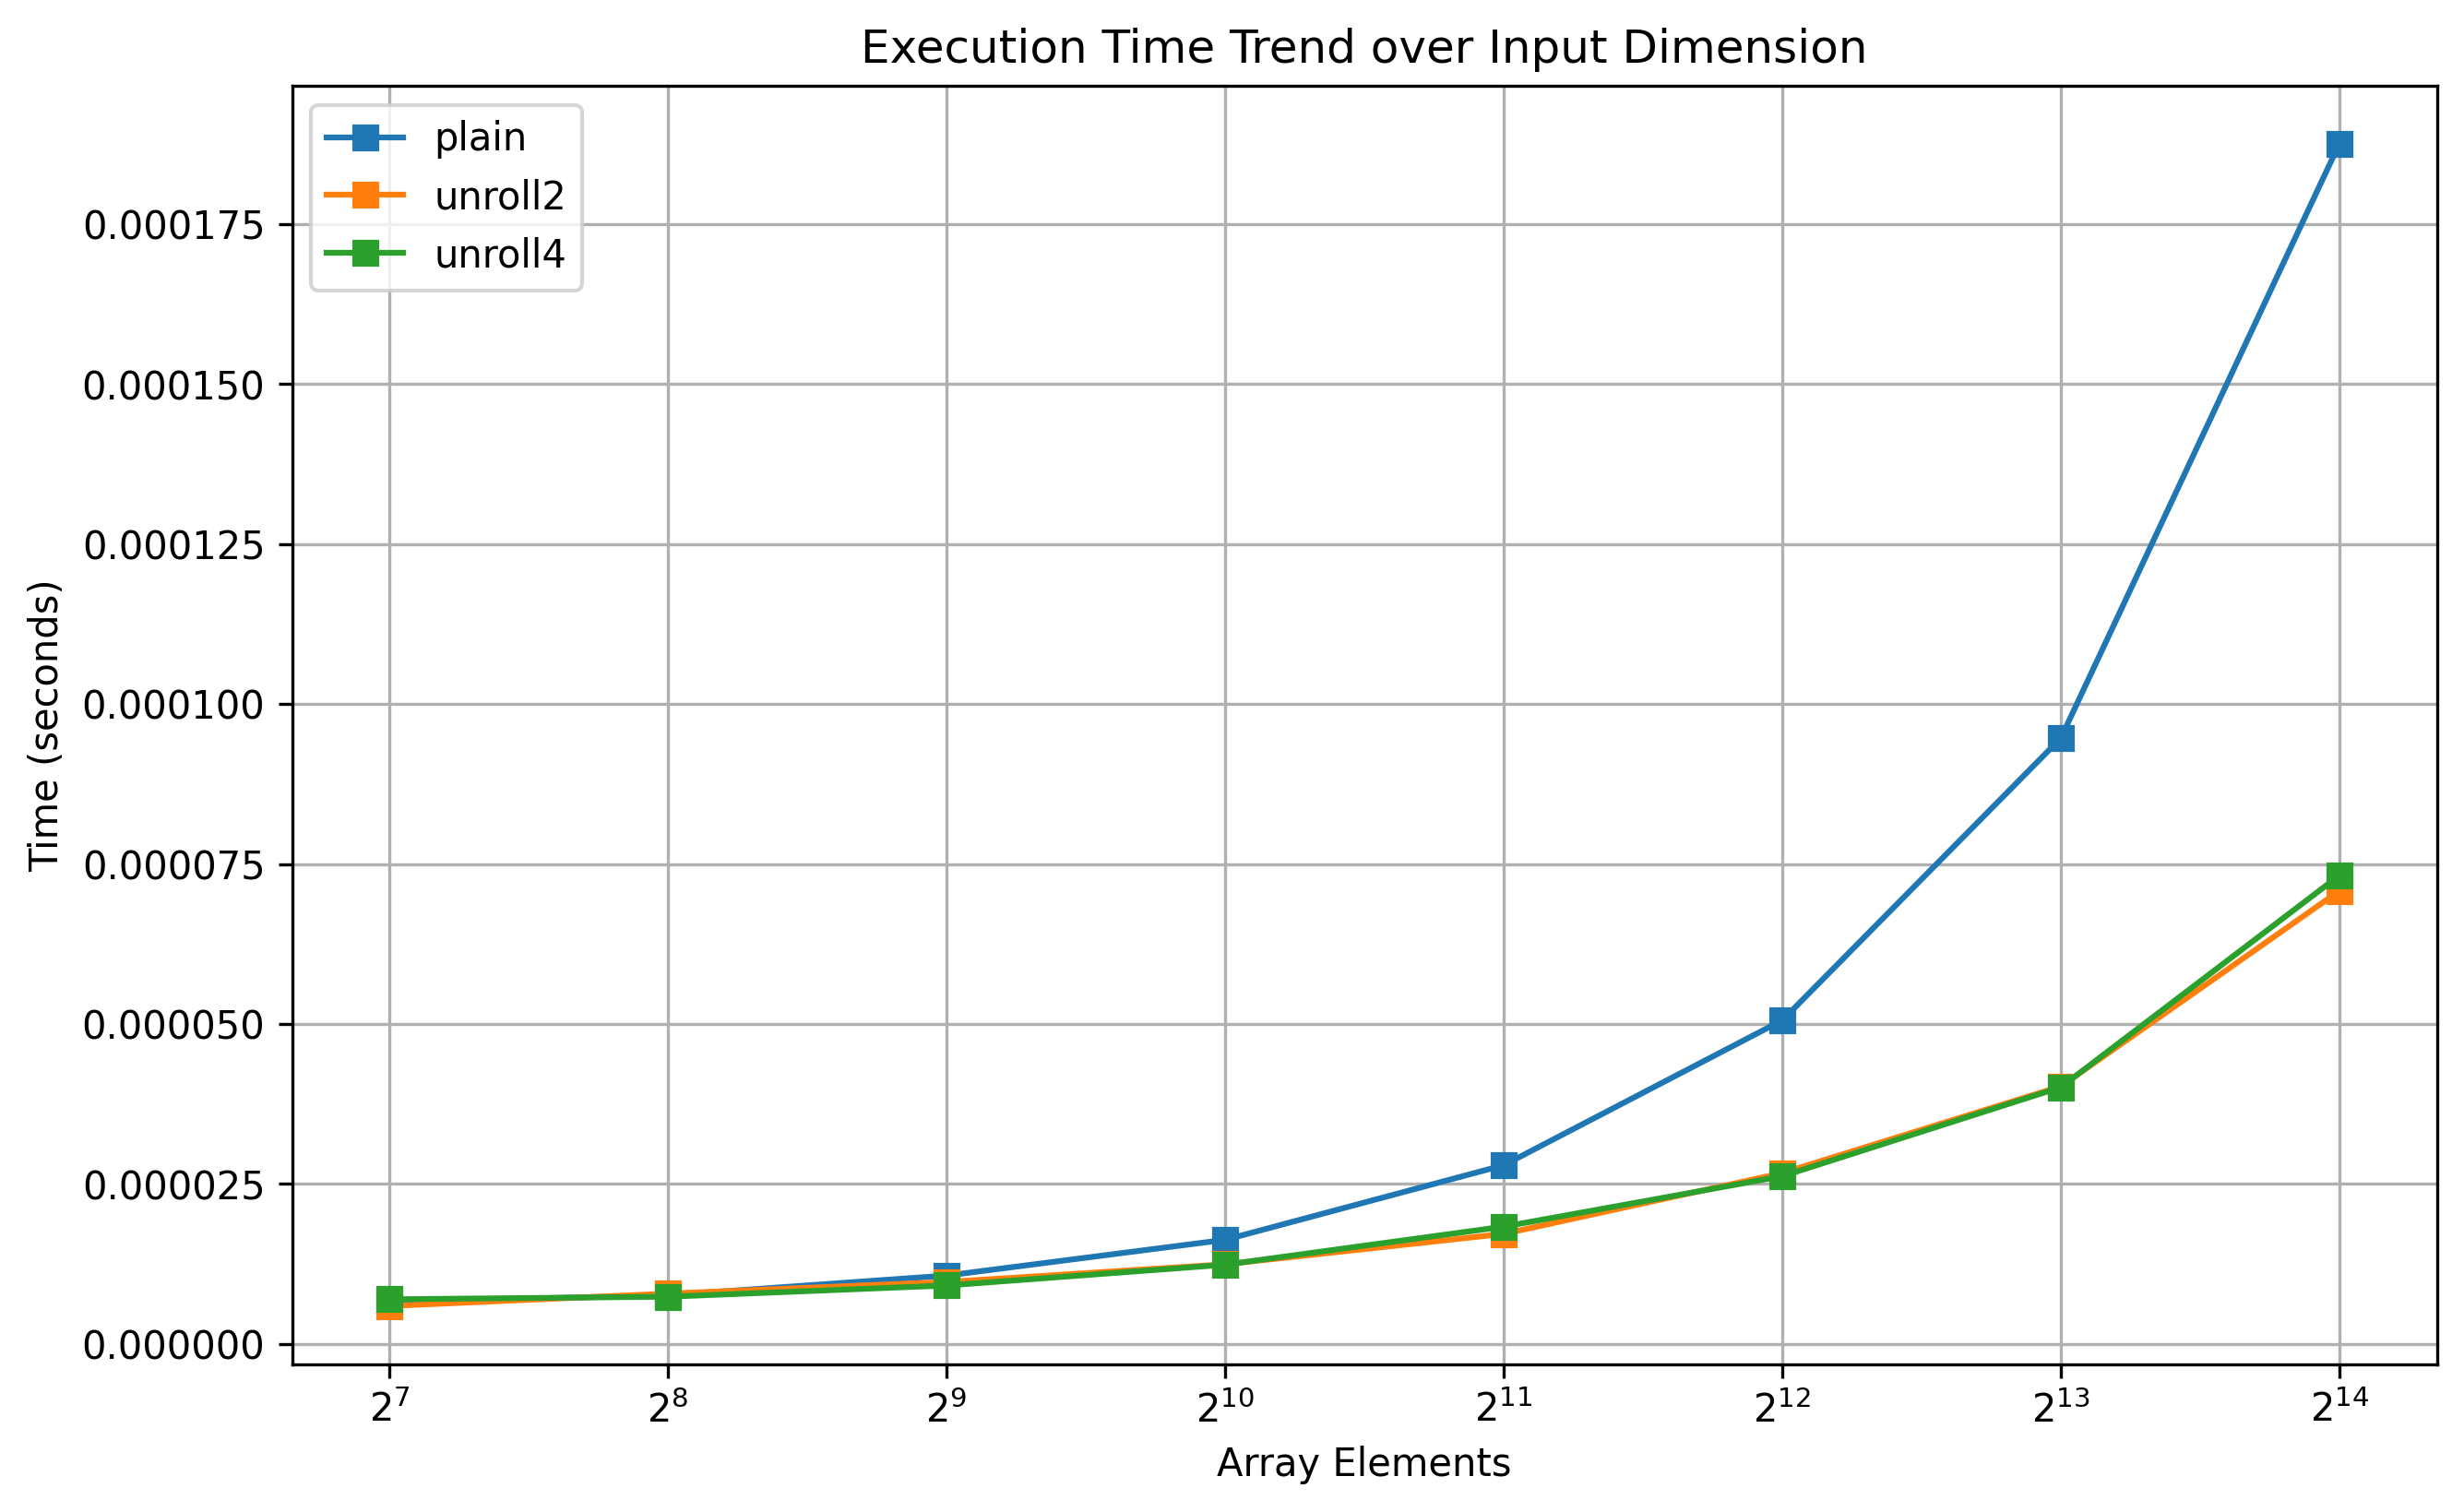

In [3]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6), dpi=300)
plt.title("Execution Time Trend over Input Dimension")


tmp = unroll2[unroll2["algorithm"] == "plain"][["array_length", "time"]]
plt.plot(tmp["array_length"], tmp["time"], marker="s", label="plain")

tmp = unroll2[unroll2["algorithm"] == "auto"][["array_length", "time"]]
plt.plot(tmp["array_length"], tmp["time"], marker="s", label="unroll2")

tmp = unroll4[unroll4["algorithm"] == "auto"][["array_length", "time"]]
plt.plot(tmp["array_length"], tmp["time"], marker="s", label="unroll4")


plt.xlabel("Array Elements")
plt.ylabel("Time (seconds)")

plt.xscale("log", base=2)
plt.grid()
plt.legend()
plt.savefig("time.svg")
plt.show()

In [ ]:
speed_ups = []

algs = df["algorithm"].unique()
sizes = df["array_length"].unique()

for alg in algs:
    for s in sizes:
        mask_plain = (df["algorithm"] == "plain") & (df["array_length"] == s)
        mask = (df["algorithm"] == alg) & (df["array_length"] == s)

        time_plain = df[mask_plain]["time"].iloc[0]
        time_alg = df[mask]["time"].iloc[0]
        speed_ups.append(time_plain / time_alg)

df["speed_up"] = speed_ups
df

In [ ]:
plt.figure(figsize=(10, 6), dpi=300)
plt.title("Speed Up trend over input dimension")

plt.plot([128, 16384], [1.0, 1.0], "r--", label="threshold")
for alg in algs:
    tmp = df[df["algorithm"] == alg][["array_length", "speed_up"]]
    if alg != "plain":
        plt.plot(tmp["array_length"], tmp["speed_up"], marker="s", label=alg)

plt.xlabel("Array Elements")
plt.ylabel("Time (seconds)")

plt.xscale("log", base=2)
plt.grid()
plt.legend()
plt.savefig("speed_up.svg")
plt.show()